In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [23]:
import factor_analyzer as fact
import missingno as msgn

# Desafío 1: Lectura de archivos

In [3]:
df = pd.read_csv('bfi.csv')

In [4]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafío 2: Preprocesamiento

In [5]:
df = df.drop('Unnamed: 0', axis=1)

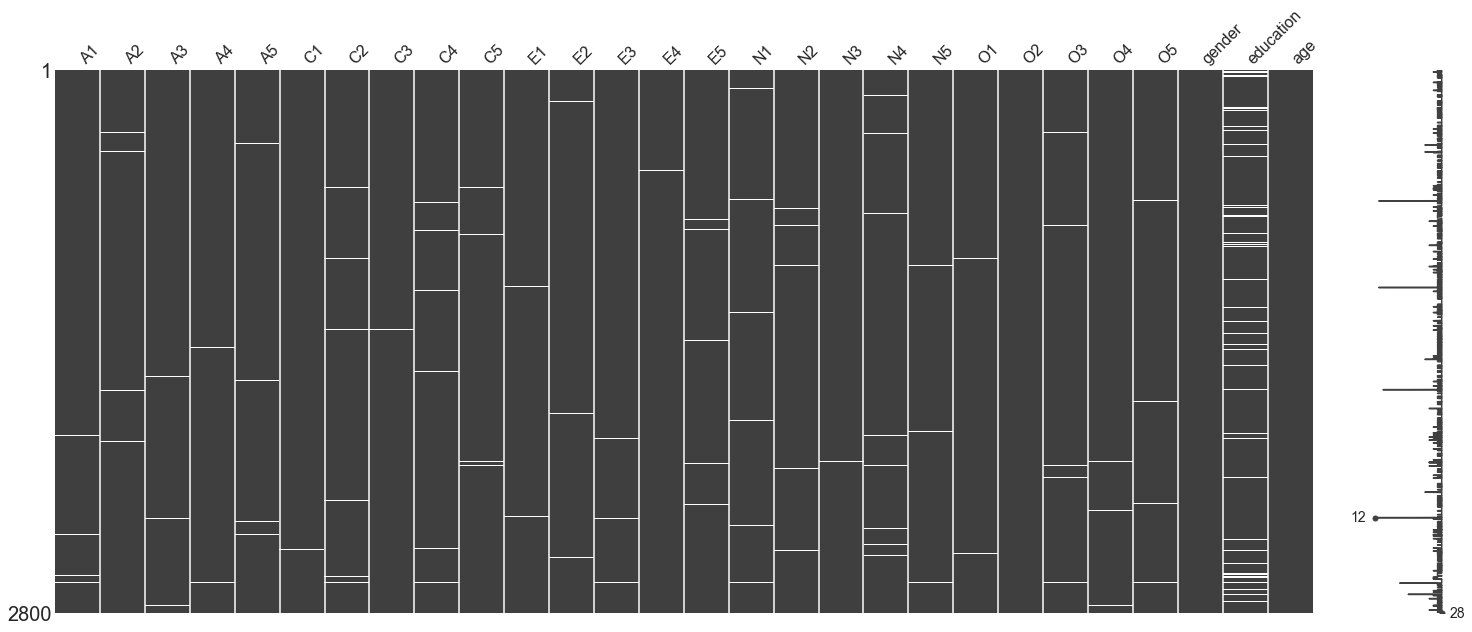

In [6]:
msgn.matrix(df)

In [7]:
for colname, serie in df.iteritems():
    print(colname, "NA %\n")
    print(serie.isnull().value_counts('%'))

A1 NA %

False    0.994286
True     0.005714
Name: A1, dtype: float64
A2 NA %

False    0.990357
True     0.009643
Name: A2, dtype: float64
A3 NA %

False    0.990714
True     0.009286
Name: A3, dtype: float64
A4 NA %

False    0.993214
True     0.006786
Name: A4, dtype: float64
A5 NA %

False    0.994286
True     0.005714
Name: A5, dtype: float64
C1 NA %

False    0.9925
True     0.0075
Name: C1, dtype: float64
C2 NA %

False    0.991429
True     0.008571
Name: C2, dtype: float64
C3 NA %

False    0.992857
True     0.007143
Name: C3, dtype: float64
C4 NA %

False    0.990714
True     0.009286
Name: C4, dtype: float64
C5 NA %

False    0.994286
True     0.005714
Name: C5, dtype: float64
E1 NA %

False    0.991786
True     0.008214
Name: E1, dtype: float64
E2 NA %

False    0.994286
True     0.005714
Name: E2, dtype: float64
E3 NA %

False    0.991071
True     0.008929
Name: E3, dtype: float64
E4 NA %

False    0.996786
True     0.003214
Name: E4, dtype: float64
E5 NA %

False    0.9925

Se verifican que education tiene la mayor cantidad de valores perdidos y luego  N5 se reparten de manera similar

In [8]:
df.shape

(2800, 28)

In [9]:
df = df.dropna()

In [10]:
df.shape

(2236, 28)

In [11]:
#parte 3

In [12]:
personality_df = df.loc[:,'A1':'O5']
personality_df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


In [14]:
mean_values = personality_df.apply(lambda x: round(x.mean(),3))

In [17]:
mean_values

A1    2.365
A2    4.834
A3    4.629
A4    4.750
A5    4.585
C1    4.570
C2    4.401
C3    4.323
C4    2.501
C5    3.255
E1    2.970
E2    3.121
E3    4.010
E4    4.431
E5    4.419
N1    2.908
N2    3.486
N3    3.199
N4    3.175
N5    2.952
O1    4.822
O2    2.689
O3    4.483
O4    4.948
O5    2.455
dtype: float64

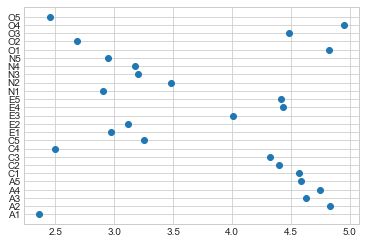

In [15]:
plt.plot(mean_values, mean_values.index , 'o')

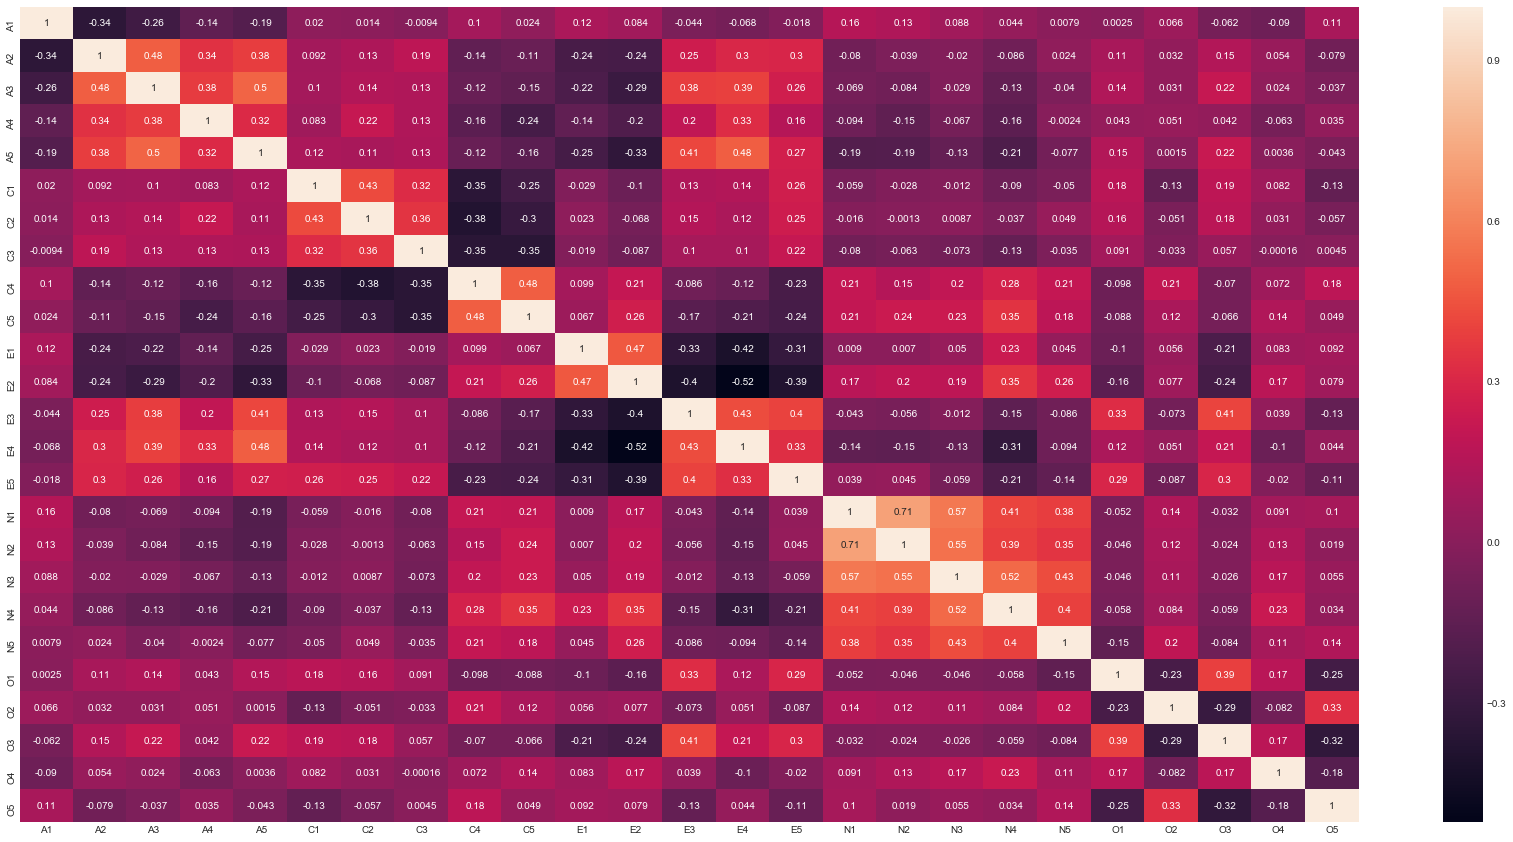

In [20]:
plt.rcParams['figure.figsize'] = (30,15)
sns.heatmap(personality_df.corr(),annot=True)

In [21]:
#preg 4

In [25]:
fact.calculate_bartlett_sphericity(personality_df)

(16509.673550497202, 0.0)

In [26]:
#existen variables latentes

In [29]:
fact.calculate_kmo(personality_df)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

In [30]:
#se logra puntaje sobre 0,7 lo cual indica que si hay correlaciones

In [34]:
personality_factor = fact.FactorAnalyzer()
personality_factor.analyze(personality_df,n_factors=10, method= None)

TypeError: 'module' object is not callable

In [35]:
personality_eigen = personality_factor.get_eigenvalues()[0]
plt.plot(personality_eigen.index +1 , personality_eigen.values, 'o')
plt.axhline(1)

NameError: name 'personality_factor' is not defined

In [36]:
#entrega 6 anotaciones

In [37]:
personality_factor_6 = fact.FactorAnalyzer()
personality_factor_6.analyze(personality_df,n_factors=6, method= None)
personality_eigen_6 = personality_factor_6.get_eigenvalues()[0]

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

In [38]:
personality_loadings = personality_factor_6.loadings
personality_loadings = personality_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x,2)))
personality_loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'loadings'

In [39]:
#model 5

In [40]:
personality_scores = personality_factor_6.get_scores(personality_df)
print(personality_scores.shape)
personality_scores.head()

AttributeError: 'FactorAnalyzer' object has no attribute 'get_scores'

In [41]:
sns.kdeplot(personality_scores.Factor1.dropna())
sns.kdeplot(personality_scores.Factor2.dropna())
sns.kdeplot(personality_scores.Factor3.dropna())
sns.kdeplot(personality_scores.Factor4.dropna())
sns.kdeplot(personality_scores.Factor5.dropna())
sns.kdeplot(personality_scores.Factor6.dropna())

NameError: name 'personality_scores' is not defined

In [42]:
#resultados medianamente diferentes, los facotres tienden a ser distintos

In [43]:
#desaf 5

In [44]:
personality_scores.head()

NameError: name 'personality_scores' is not defined

In [45]:
for colnames,serie in personality_scores.iteritems():
    df[str(colnames)] = serie

NameError: name 'personality_scores' is not defined

In [46]:
df['gender'] = df['gender'].replace([1,2],[1,0])

In [47]:
for i in df.loc[:, 'Factor 1':'Factor 6']:
    print(i)
    print(smf.ols(i + "~gender +education + age",df).fit().summary().tables[1])

KeyError: 'Factor 1'